# Example of running BioJava in a Jupyter Notebook
This notebook demonstrates how to setup the BioJava dependencies, run BioJava code using the Java Kernel, and finally use a Python cell to plot results.

### Setup BioJava dependencies
Configure class path resolver to use a local copy of jar files in the maven repository (~/.m2/repository).

In [1]:
%classpath config resolver mvnLocal

Added new repo: mvnLocal


Load the required dependencies from the local maven repository.

In [2]:
%classpath add mvn org.biojava biojava-structure 5.1.1

### Define method to calculate elipse radii around the principal axes of inertia of a protein chain
Each cell must be  a compilable unit, e.g., a class definition.

In [3]:
import org.biojava.nbio.structure.*;
import org.biojava.nbio.structure.geometry.*;

public class Shape {
    public static double[] getElipsisRadii(Chain c) {
        MomentsOfInertia moi = new MomentsOfInertia();
        // use C-alpha atoms only
        for (Atom a: StructureTools.getAtomCAArray(c)) {
            moi.addPoint(a.getCoordsAsPoint3d(), 1.0);
        }
        return moi.getElipsisRadii();
    }
}

com.twosigma.beaker.javash.bkrfaddd993.Shape

## Calculate elipse radii for a representative subset of PDB chains
Imports are not global, they need to be defined for each cell. However, classes defined in other cells can be accessed.

In [4]:
import java.util.*;
import java.io.*;
import org.biojava.nbio.structure.*;
import org.biojava.nbio.structure.symmetry.utils.BlastClustReader;

// store PDB chain id and elipse radii in a csv file
String fileName = "radii.csv";
PrintWriter pw = new PrintWriter(new FileWriter(fileName));
pw.println("id,r1,r2,r3");

// use increment to only use every n-th representative
int count = 0;
int n = 100;

// get representative PDB protein chains for 30% sequence identity clusters
BlastClustReader br = new BlastClustReader(30);

for (List<String> cluster: br.getPdbChainIdClusters()) {
    // sample every n-th representative
    if (count++ % n == 0) {
        
        // get the id for first chain in each sequence cluster
        String pdbChainId = cluster.get(0);
        System.out.print(pdbChainId + " ");
        
        // download chain
        Structure s = StructureIO.getStructure(pdbChainId);
        Chain c = s.getPolyChains().get(0);
        
        // calculate and save elipse radii
        double[] r = Shape.getElipsisRadii(c);
        pw.println(pdbChainId + "," + r[0] + "," + r[1] + "," + r[2]);
    }
}
pw.close();

5AZE.H 5AA0.AT 4H9U.A 5YAM.A 1LWD.A 1FZU.A 4JH8.A 5J8D.A 1HX6.A 3R7T.A 6D90.s 4GAF.A 6DXL.A 3HS0.A 1LXY.A 2POH.A 3IE1.A 6C92.B 3CT4.A 2AG1.A 1IS7.A 4RC7.A 1M5Q.A 2QZ8.A 3NXE.A 5H1Q.A 4B97.A 3NEC.A 5J7U.A 3GVM.A 5JR7.B 2B42.A 4J0K.A 5X0N.A 4YOK.A 4EUO.A 1SQL.A 3IXL.A 6EU2.M 3THN.A 5JJU.A 2C1D.B 1GG4.A 3K7T.A 3F5F.A 2JM1.A 2IML.A 5M73.C 1VC9.A 4LCK.A 4HL9.A 1EZV.B 1W4G.A 4Q73.A 3C9G.A 1WAO.1 1V2B.A 4J25.A 5GUW.A 4H9P.C 5IT0.A 3ABG.A 3RQZ.A 1O7L.A 1TV8.A 3R6Y.A 2ICW.G 3QWU.A 4EJQ.A 1ZMQ.A 5XSX.A 4MLD.A 5DIR.A 2DS7.A 5LJY.A 5W0X.A 2D5L.A 1KYO.F 2WIU.B 1VG0.A 4R3I.A 1KAF.A 3O6U.A 4BRJ.A 2WP4.A 5U9Z.A 5G52.A 3PM9.A 5WTI.Z 5GQH.B 1IJX.A 5LC5.B 4BFG.A 3DZD.A 4LKU.A 4PWA.A 4N0N.A 2LR6.A 2I1J.A 6B4M.A 5LF9.A 2M8R.A 5JTV.A 3ISR.A 2EQ5.A 1J4J.A 5XDH.A 1YQE.A 5UWB.B 3K7C.A 4V7O.AE 2HX1.A 4XPZ.A 3D3S.A 2H1O.E 4M70.E 4II1.A 4FXQ.A 3OPY.A 4V9J.Be 5TUV.A 5XMJ.C 4J7H.A 1SCF.A 4V62.AX 5GUG.A 4OM3.A 2R78.A 4IRV.A 1ZXJ.A 5K2Y.A 2JNC.A 3WFO.A 6HIY.CE 5MRF.3 5NFM.A 4Q4G.X 1C6W.A 4HGK.C 4J2J.D 4MBE.B 2O5F.A 3

null

## Plot the distribution of radii
Use a Python cell to plot the results using Matplotlib.

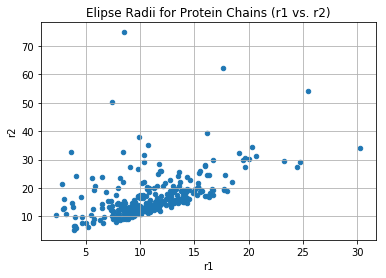

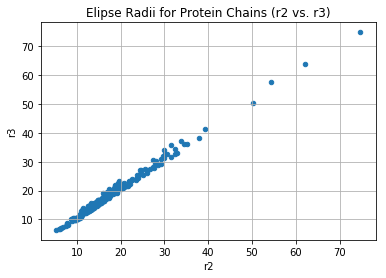

In [5]:
%%python
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('radii.csv')

df.plot.scatter(x='r1',y='r2',grid=True,title='Elipse Radii for Protein Chains (r1 vs. r2)')
df.plot.scatter(x='r2',y='r3',grid=True,title='Elipse Radii for Protein Chains (r2 vs. r3)');